In [1]:
import shutil, os, re, pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [2]:
id = [re.findall('\d+',i) for i in os.listdir(path='/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped')]
# If we extract all directory name with findall we return it as list.
# then we convert it to a 1D array where we find the unique values of the list using set operation and appending to a dataframe.
flat_list = [j for i in id for j in i] 
df = pd.DataFrame(list(set(flat_list)), columns=["Subject_ID"])
# Creating empty column
df['COUNT'] = ''
df['HEART_RATE'] = ''
df['MOTION'] = ''
df['PSG'] = ''

In [3]:
def foo(path):
    f = open(path)
    lines = [[i.strip()] for i in f.readlines()]
    return lines

In [4]:
first = '/Users/aneruthmohanasundaram/Documents'
second = '/GitHub/Data-Analytics/Practical Session 3/cropped/'

In [5]:
for i in range(len(df['Subject_ID'])):
    if df['Subject_ID'][i] == '9961348':
        df['COUNT'][i] = len(foo('/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/9961348_cleaned_counts.out'))
        df['HEART_RATE'][i] = len(foo('/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/9961348_cleaned_hr.out'))
        df['MOTION'][i] = len(foo('/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/9961348_cleaned_motion.out'))
        df['PSG'][i] = len(foo('/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/9961348_cleaned_psg.out'))

In [6]:
ane = list(set(flat_list))
ane.sort()

In [7]:
d = pd.DataFrame(columns=['Subject ID','Motion','Heart Rate','Steps','Sleep labels'])
x = list(set(flat_list))
x.sort()
d['Subject ID'] = x

In [8]:
d.head()

,Subject ID,Motion,Heart Rate,Steps,Sleep labels
0,1066528,NaN,NaN,NaN,NaN
1,1360686,NaN,NaN,NaN,NaN
2,1449548,NaN,NaN,NaN,NaN
3,1455390,NaN,NaN,NaN,NaN
4,1818471,NaN,NaN,NaN,NaN


In [9]:
b = [i for i in os.listdir(path='/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped')]
b.sort()

In [10]:
for i in range(len(d['Subject ID'])):
    if d['Subject ID'][i] == ane[i]:
        d['Motion'][i] = len(foo(os.path.join(first+second+ane[i]+'_cleaned_motion.out')))
        d['Heart Rate'][i] = len(foo(os.path.join(first+second+ane[i]+'_cleaned_hr.out')))
        d['Steps'][i] = len(foo(os.path.join(first+second+ane[i]+'_cleaned_counts.out')))
        d['Sleep labels'][i] = len(foo(os.path.join(first+second+ane[i]+'_cleaned_psg.out')))

In [11]:
d.head(30)

,Subject ID,Motion,Heart Rate,Steps,Sleep labels
0,1066528,1187903,4964,1892,951
1,1360686,1383532,5574,1850,967
2,1449548,1620804,5549,1927,964
3,1455390,1483701,5717,1978,989
4,1818471,1481035,5701,1973,987
5,2598705,1443360,5334,1963,982
6,2638030,1785879,5537,1936,968
7,3509524,824091,2496,832,416
8,3997827,1674644,5673,1951,976
9,4018081,965332,3054,996,509


In [12]:
# pd.to_numeric(d['Motion','Heart Rate','Steps','Sleep labels'])
cols = ['Motion','Heart Rate','Steps','Sleep labels']
for i in cols:
    pd.to_numeric(d[i])

d["sum"] = d[cols].sum(axis=1)

In [13]:
d.head(30)

,Subject ID,Motion,Heart Rate,Steps,Sleep labels,sum
0,1066528,1187903,4964,1892,951,1195710.0
1,1360686,1383532,5574,1850,967,1391923.0
2,1449548,1620804,5549,1927,964,1629244.0
3,1455390,1483701,5717,1978,989,1492385.0
4,1818471,1481035,5701,1973,987,1489696.0
5,2598705,1443360,5334,1963,982,1451639.0
6,2638030,1785879,5537,1936,968,1794320.0
7,3509524,824091,2496,832,416,827835.0
8,3997827,1674644,5673,1951,976,1683244.0
9,4018081,965332,3054,996,509,969891.0


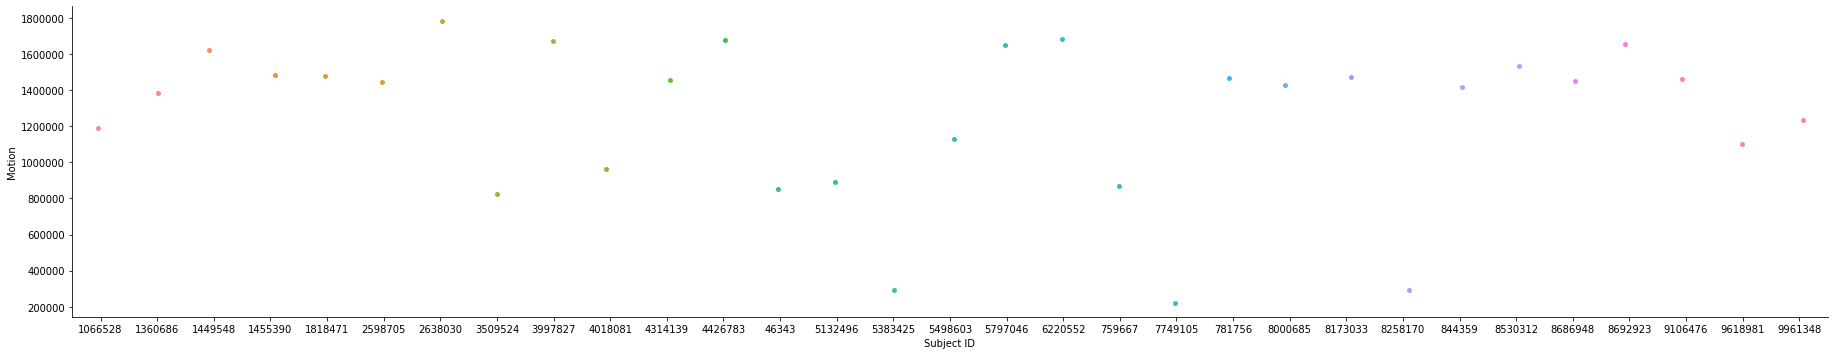

In [28]:
sns.catplot(x='Subject ID',y='Motion',data=d,kind='strip',height=5, aspect=25/5)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

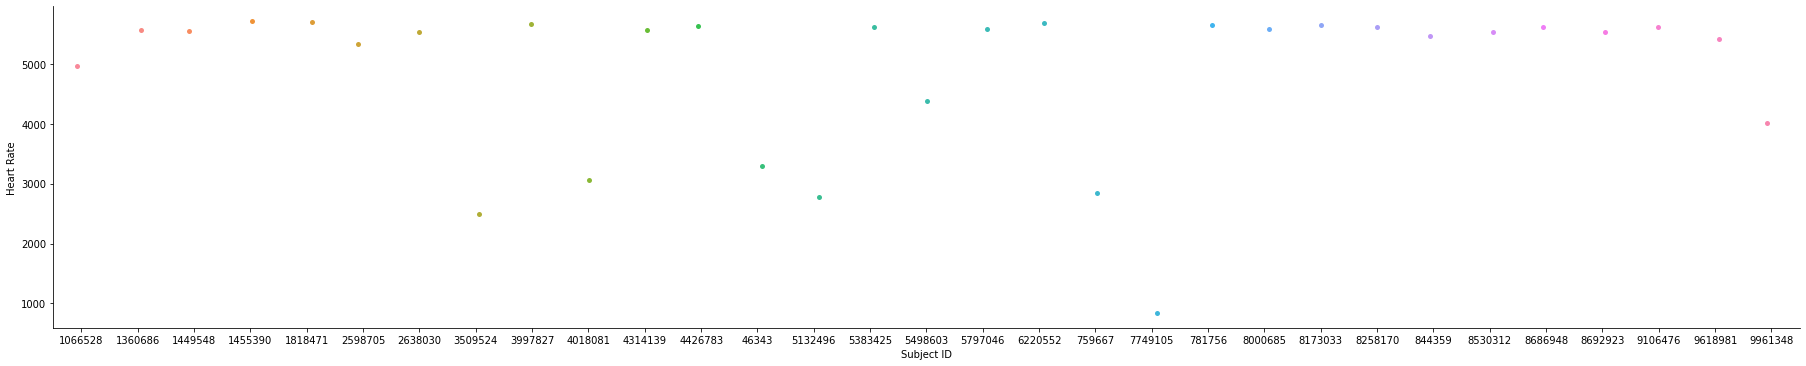

In [29]:
sns.catplot(x='Subject ID',y='Heart Rate',data=d,kind='strip',height=5, aspect=25/5)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

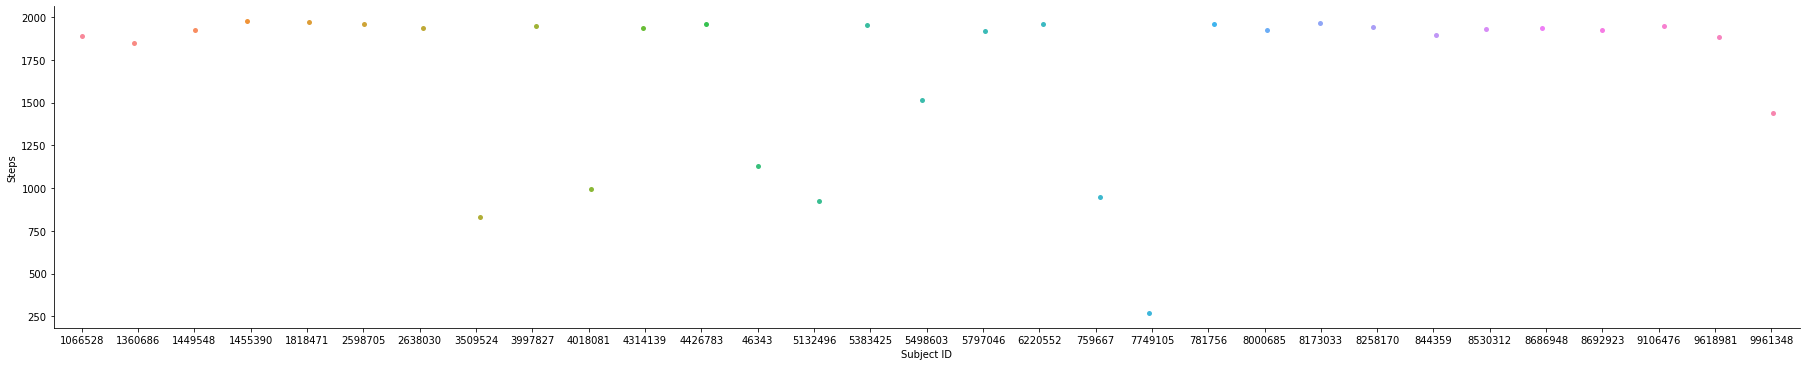

In [30]:
sns.catplot(x='Subject ID',y='Steps',data=d,kind='strip',height=5, aspect=25/5)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

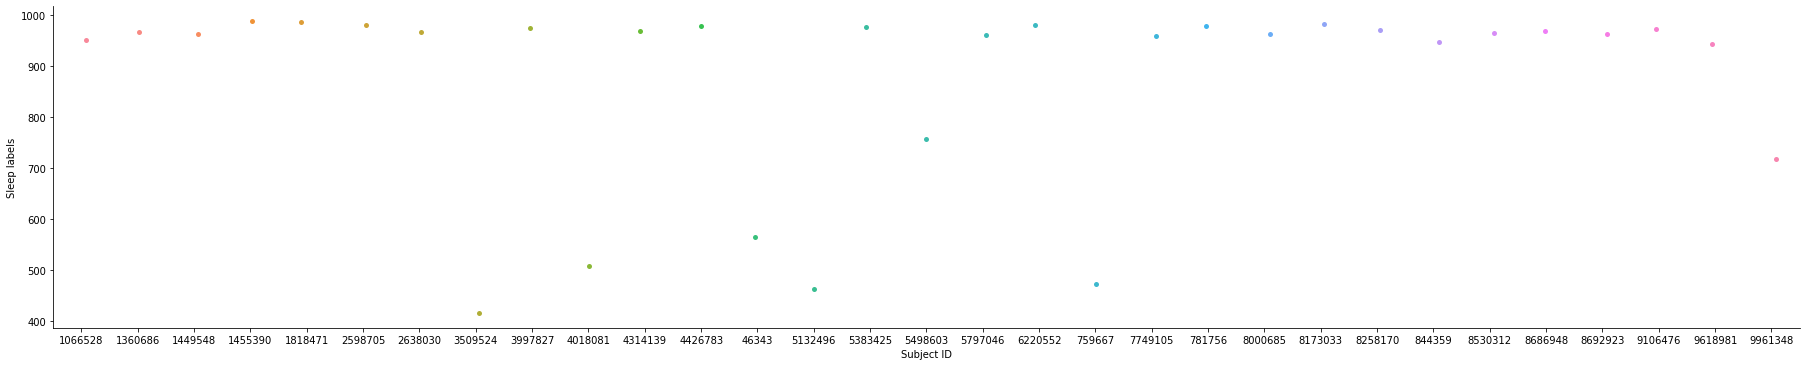

In [32]:
sns.catplot(x='Subject ID',y='Sleep labels',data=d,kind='strip',height=5, aspect=25/5)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

In [30]:
######   all three acceleration axes per timestamp (in one graph) ######


TypeError: 'int' object is not iterable